In [30]:
import pandas as pd

file_path = r'data\daily_flows.csv'  # Update this path accordingly
daily_flows = pd.read_csv(file_path, skiprows=2, header=0, usecols=[2, 3], parse_dates=[0], names=['Date', 'Flow'])

print(daily_flows.head())

        Date  Flow
0 1978-09-28  18.3
1 1978-09-29  19.1
2 1978-09-30  21.6
3 1978-10-01  19.4
4 1978-10-02  14.8


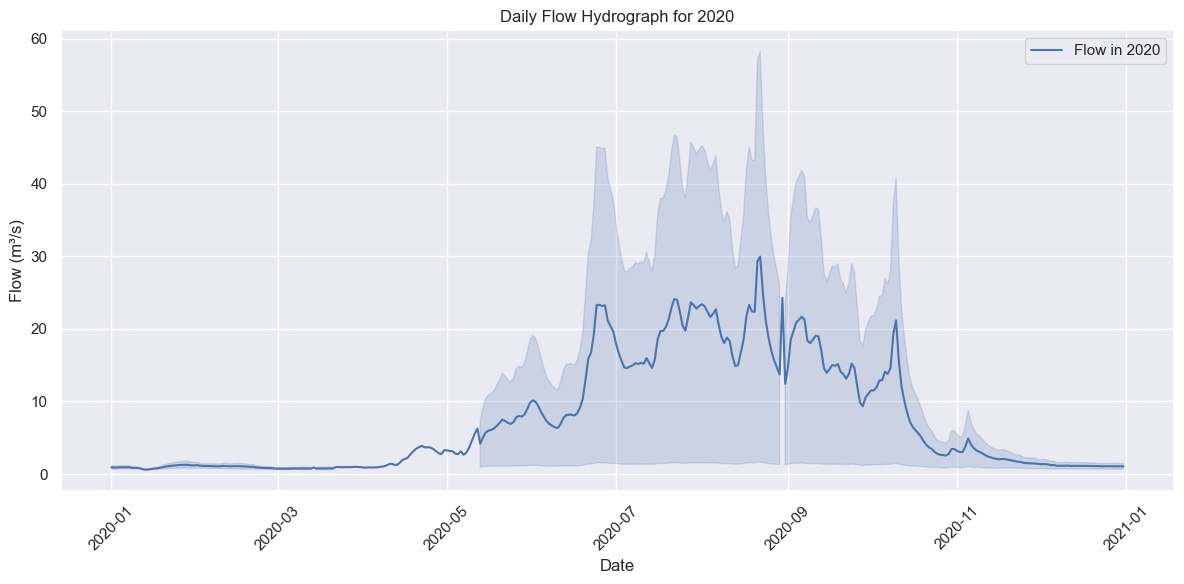

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

def plot_hydrograph_for_year(df, year):
    """
    Plot a hydrograph for a specific year from a DataFrame of daily flow data using Seaborn.
    
    Parameters:
    - df: DataFrame containing the daily flow data with 'Date' and 'Flow' columns.
    - year: Integer representing the year to plot.
    """
    # Filter the DataFrame for the specified year
    year_data = df[df['Date'].dt.year == year]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Flow', data=year_data, label=f'Flow in {year}', linestyle='-')
    plt.title(f'Daily Flow Hydrograph for {year}')
    plt.xlabel('Date')
    plt.ylabel('Flow (m³/s)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage of the function (replace 2020 with the year of interest)
# plot_hydrograph_for_year(daily_flows, 2020)
plot_hydrograph_for_year(daily_flows, 2020)

In [32]:
import plotly.express as px

def plot_hydrograph_for_year(df, year):
    """
    Plot a hydrograph for a specific year from a DataFrame of daily flow data using Plotly.
    
    Parameters:
    - df: DataFrame containing the daily flow data with 'Date' and 'Flow' columns.
    - year: Integer representing the year to plot.
    """
    # Filter the DataFrame for the specified year
    year_data = df[df['Date'].dt.year == year]
    
    # Create a Plotly figure
    fig = px.line(year_data, x='Date', y='Flow', title=f'Daily Flow Hydrograph for {year}', labels={'Flow': 'Flow (m³/s)'})
    fig.update_layout(xaxis_title='Date', yaxis_title='Flow (m³/s)', legend_title='Legend')
    fig.update_traces(mode='lines', name=f'Flow in {year}')
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Flow (m³/s)',
        legend_title='Legend',
        autosize=True,
    )

    return fig

plot_hydrograph_for_year(daily_flows, 2020)

In [19]:
import pandas as pd

# Assuming 'daily_flows' is your DataFrame with 'Date' and 'Flow' columns
daily_flows['Date'] = pd.to_datetime(daily_flows['Date'])  # Convert 'Date' to datetime format
daily_flows['Year'] = daily_flows['Date'].dt.year  # Extract 'Year' from 'Date'
daily_flows['Month'] = daily_flows['Date'].dt.month  # Extract 'Month' from 'Date'

# Group by 'Year' and 'Month', then calculate mean flow
monthly_avg_inflow = daily_flows.groupby(['Year', 'Month'])['Flow'].mean().reset_index()

# Optionally, create a datetime column for the first day of each month
monthly_avg_inflow['Date'] = pd.to_datetime(monthly_avg_inflow[['Year', 'Month']].assign(DAY=1))

# Display the first few rows of the result
print(monthly_avg_inflow.head())
print(monthly_avg_inflow.tail())

   Year  Month       Flow       Date
0  1978      9  19.666667 1978-09-01
1  1978     10   9.168710 1978-10-01
2  1978     11   1.424767 1978-11-01
3  1978     12   0.506516 1978-12-01
4  1979      1   0.306903 1979-01-01
     Year  Month       Flow       Date
521  2022      8  24.200097 2022-08-01
522  2022      9  13.380517 2022-09-01
523  2022     10   7.972661 2022-10-01
524  2022     11   1.575098 2022-11-01
525  2022     12   0.871548 2022-12-01


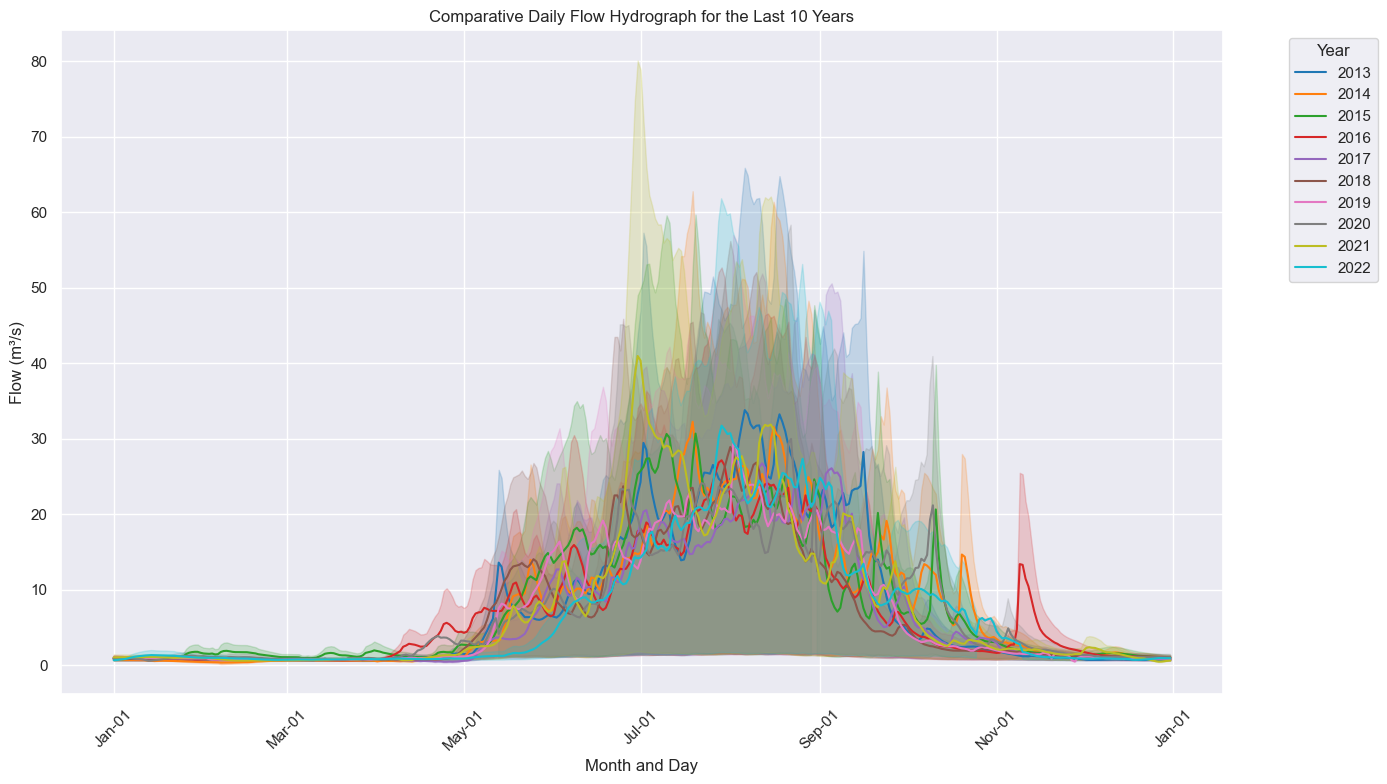

In [20]:
import pandas as pd

# Clone the DataFrame to avoid altering the original data
df_normalized = daily_flows.copy()

# Normalize the 'Date' to the same year (e.g., 2000) for all entries
df_normalized['Normalized Date'] = df_normalized['Date'].apply(lambda x: x.replace(year=2000))

# Ensure you still have the 'Year' column for hue in the plot
df_normalized['Year'] = df_normalized['Date'].dt.year

# Determine the last year in your dataset
last_year = df_normalized['Year'].max()

# Filter to include only the last 10 years
df_last_10_years = df_normalized[df_normalized['Year'] >= last_year - 9]

plt.figure(figsize=(14, 8))
sns.lineplot(x='Normalized Date', y='Flow', hue='Year', data=df_last_10_years, palette='tab10', marker='', linestyle='-')
plt.title('Comparative Daily Flow Hydrograph for the Last 10 Years')
plt.xlabel('Month and Day')
plt.ylabel('Flow (m³/s)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve x-axis to show month and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Assuming 'daily_flows' is your original DataFrame and 'Date' is the datetime column
daily_flows['Normalized Date'] = daily_flows['Date'].apply(lambda x: x.replace(year=2000))

# Group by 'Normalized Date' and calculate the mean flow
average_flows = daily_flows.groupby('Normalized Date')['Flow'].mean().reset_index()

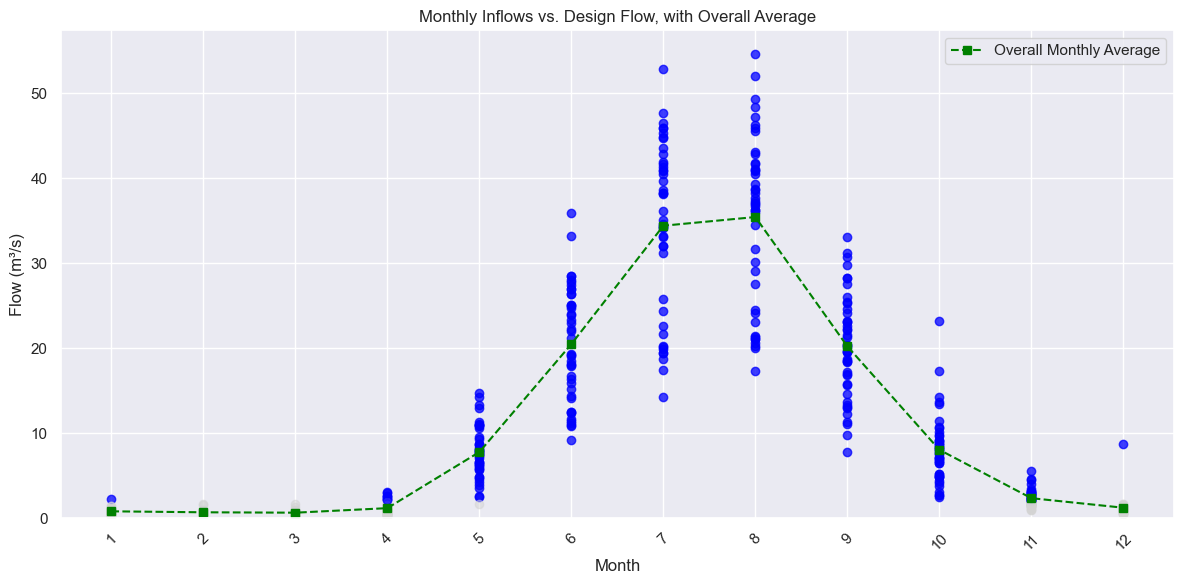

Overall Monthly Average:     Month       Flow
0       1   0.823981
1       2   0.711193
2       3   0.664165
3       4   1.197455
4       5   7.797878
5       6  20.494097
6       7  34.418700
7       8  35.438556
8       9  20.226051
9      10   8.061318
10     11   2.369050
11     12   1.247656


In [22]:
import matplotlib.pyplot as plt

# Calculate the overall monthly average for all flows
overall_monthly_avg = monthly_avg_inflow.groupby('Month')['Flow'].mean().reset_index()

# Assuming 'monthly_avg_inflow' is your DataFrame with 'Date', 'Flow', and 'Month' columns
# And 'overall_monthly_avg' is calculated as shown previously

plt.figure(figsize=(12, 6))

# Plot each point individually, highlighting values below 2 m³/s differently
for _, row in monthly_avg_inflow.iterrows():
    if row['Flow'] < 2:
        plt.plot(row['Month'], row['Flow'], marker='o', color='lightgrey', linestyle='', alpha=0.5)
    else:
        plt.plot(row['Month'], row['Flow'], marker='o', linestyle='-', color='blue', alpha=0.75)  # Slightly transparent for clarity

# Plot overall monthly average inflow for comparison
plt.plot(overall_monthly_avg['Month'], overall_monthly_avg['Flow'], 's--', label='Overall Monthly Average', color='green')

# Customization for readability and aesthetics
plt.title('Monthly Inflows vs. Design Flow, with Overall Average')
plt.xlabel('Month')
plt.ylabel('Flow (m³/s)')
plt.legend()
plt.grid(True)
plt.xticks(monthly_avg_inflow['Month'].unique(), rotation=45)  # Ensure unique months are correctly ordered if necessary
plt.gca().set_ylim(bottom=0)
plt.tight_layout()
plt.show()

print(f'Overall Monthly Average: {overall_monthly_avg}')  # Display the overall monthly average inflow

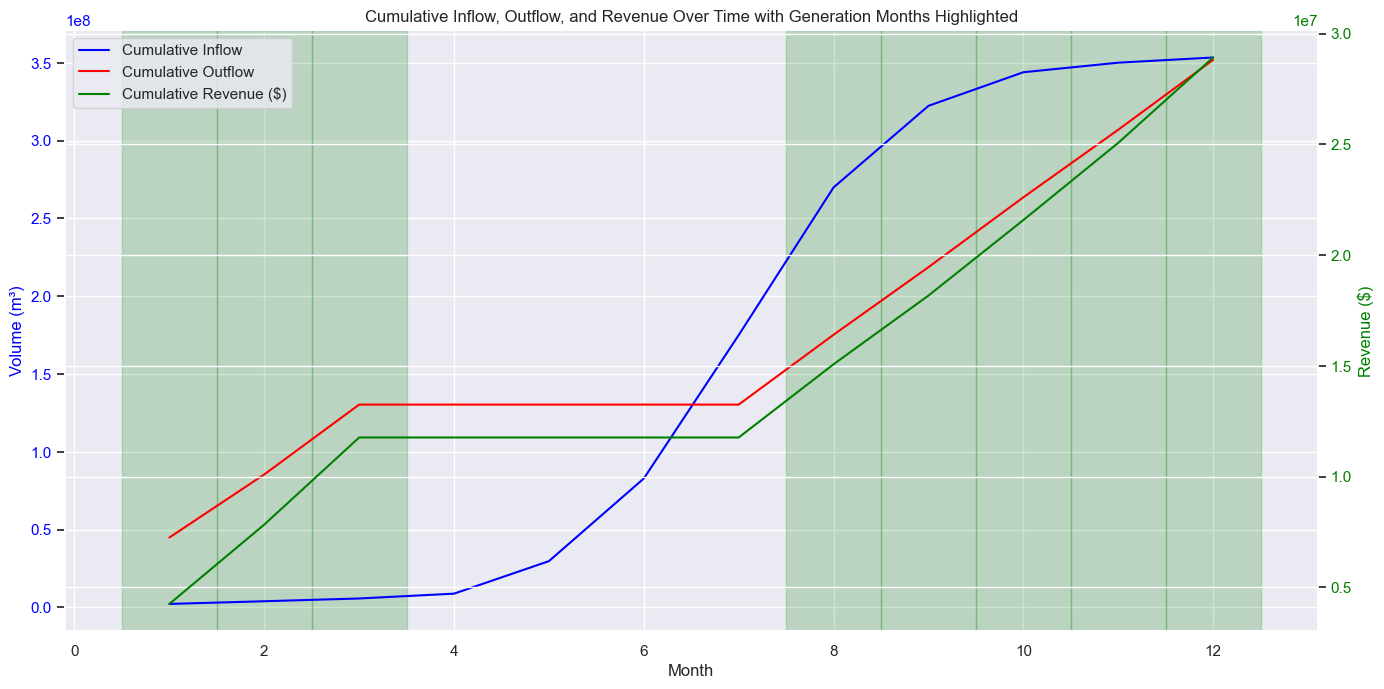

    Month       Flow  Hours  Env Flow Volume  Inflow Volume  Outflow Volume  \
0       1   0.823981    744        2244499.2   2.206951e+06      44889984.0   
1       2   0.711193    672        2027289.6   1.720518e+06      40545792.0   
2       3   0.664165    744        2244499.2   1.778899e+06      44889984.0   
3       4   1.197455    720        2172096.0   3.103804e+06             0.0   
4       5   7.797878    744        2244499.2   2.088584e+07             0.0   
5       6  20.494097    720        2172096.0   5.312070e+07             0.0   
6       7  34.418700    744        2244499.2   9.218705e+07             0.0   
7       8  35.438556    744        2244499.2   9.491863e+07      44889984.0   
8       9  20.226051    720        2172096.0   5.242592e+07      43441920.0   
9      10   8.061318    744        2244499.2   2.159143e+07      44889984.0   
10     11   2.369050    720        2172096.0   6.140577e+06      43441920.0   
11     12   1.247656    744        2244499.2   3.341

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Constants
efficiency = 0.86
design_flow_m3_s = 16.76  # m³/s
gravity = 9.81  # m/s²
water_density = 1000  # kg/m³
max_head_m = 335.8  # m
reservoir_area = 13.425869e6  # m²
full_reservoir_volume_m3 = 261804445.5  # m³
env_flow_percentage = 0.05  # 5% of design flow
base_price_per_mwh = 100  # Base price in $/MWh
hours_in_month = {1: 744, 2: 672, 3: 744, 4: 720, 5: 744, 6: 720, 7: 744, 8: 744, 9: 720, 10: 744, 11: 720, 12: 744}
generation_months = [1, 2, 3, 8, 9, 10, 11, 12]  # Example generation months

# Adjusted Time of Delivery Factor Table to use month numbers as keys
on_peak_factors = {1: 1.34, 2: 1.26, 3: 1.26, 4: 1.14, 5: 0.45, 6: 0.45, 
                   7: 1.05, 8: 1.13, 9: 1.10, 10: 1.18, 11: 1.25, 12: 1.34}
off_peak_factors = {1: 1.18, 2: 1.11, 3: 1.11, 4: 0.99, 5: 0.19, 6: 0.19,
                    7: 0.75, 8: 0.97, 9: 0.95, 10: 1.02, 11: 1.09, 12: 1.18}

# Map hours to months and calculate volumes
overall_monthly_avg['Hours'] = overall_monthly_avg['Month'].map(hours_in_month)
overall_monthly_avg['Env Flow Volume'] = design_flow_m3_s * env_flow_percentage * overall_monthly_avg['Hours'] * 3600
overall_monthly_avg['Inflow Volume'] = overall_monthly_avg['Flow'] * overall_monthly_avg['Hours'] * 3600
overall_monthly_avg['Outflow Volume'] = np.where(overall_monthly_avg['Month'].isin(generation_months), design_flow_m3_s * overall_monthly_avg['Hours'] * 3600, 0)

# Initialize the reservoir volume and calculate dynamic head, power output, and revenue
overall_monthly_avg['Reservoir Volume (m³)'] = full_reservoir_volume_m3 - overall_monthly_avg['Env Flow Volume'].cumsum()  # Simplified for demonstration

# Adjust price per MWh for each month based on peak factors
def adjusted_price(month):
    days_in_month = calendar.monthrange(2024, month)[1]  # Assuming the year is 2024
    hours_on_peak = 5 * days_in_month
    hours_off_peak = (24 - 5) * days_in_month
    price_on_peak = on_peak_factors[month] * base_price_per_mwh
    price_off_peak = off_peak_factors[month] * base_price_per_mwh
    return (price_on_peak * hours_on_peak + price_off_peak * hours_off_peak) / (hours_on_peak + hours_off_peak)

overall_monthly_avg['Adjusted Price per MWh'] = overall_monthly_avg['Month'].apply(adjusted_price)

# Assume generation only in specified months, otherwise, revenue is 0
overall_monthly_avg['Power Output (MW)'] = np.where(overall_monthly_avg['Month'].isin(generation_months),
                                                    efficiency * design_flow_m3_s * (overall_monthly_avg['Reservoir Volume (m³)']/full_reservoir_volume_m3) * max_head_m * gravity * water_density / 1e6,
                                                    0)
overall_monthly_avg['Revenue ($)'] = overall_monthly_avg['Power Output (MW)'] * overall_monthly_avg['Hours'] * overall_monthly_avg['Adjusted Price per MWh']

# Calculate cumulative values
overall_monthly_avg['Cumulative Inflow'] = overall_monthly_avg['Inflow Volume'].cumsum()
overall_monthly_avg['Cumulative Revenue ($)'] = overall_monthly_avg['Revenue ($)'].cumsum()
overall_monthly_avg['Cumulative Outflow'] = overall_monthly_avg['Outflow Volume'].cumsum()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the cumulative data on the primary axis
ax1.plot(overall_monthly_avg['Month'], overall_monthly_avg['Cumulative Inflow'], label='Cumulative Inflow', color='blue')
ax1.plot(overall_monthly_avg['Month'], overall_monthly_avg['Cumulative Outflow'], label='Cumulative Outflow', color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Volume (m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plotting the revenue data on the secondary axis
ax2 = ax1.twinx()
ax2.plot(overall_monthly_avg['Month'], overall_monthly_avg['Cumulative Revenue ($)'], label='Cumulative Revenue ($)', color='green')
ax2.set_ylabel('Revenue ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Highlight generating months
for month in range(1, 13):
    if month in generation_months:
        ax1.axvspan(month - 0.5, month + 0.5, color='green', alpha=0.2)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.title('Cumulative Inflow, Outflow, and Revenue Over Time with Generation Months Highlighted')
plt.show()

# Display the DataFrame
print(overall_monthly_avg)  # Display the DataFrame with calculated values



In [24]:
import plotly.express as px

def plot_hydrograph_for_year(df, year):
    """
    Plot a hydrograph for a specific year from a DataFrame of daily flow data using Plotly.
    
    Parameters:
    - df: DataFrame containing the daily flow data with 'Date' and 'Flow' columns.
    - year: Integer representing the year to plot.
    """
    # Filter the DataFrame for the specified year
    year_data = df[df['Date'].dt.year == year]
    
    # Create a Plotly figure
    fig = px.line(year_data, x='Date', y='Flow', title=f'Daily Flow Hydrograph for {year}', labels={'Flow': 'Flow (m³/s)'})
    fig.update_layout(xaxis_title='Date', yaxis_title='Flow (m³/s)', legend_title='Legend')
    fig.update_traces(mode='lines', name=f'Flow in {year}')
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Flow (m³/s)',
        legend_title='Legend',
        autosize=True,
    )

    return fig

plot_hydrograph_for_year(daily_flows, 2020)